## DAY-21

Import Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv(r"C:\Users\SAMSUNG FOR BUSINESS\Downloads\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.shape

(34, 3)

In [3]:
data.head

<bound method NDFrame.head of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayune 

In [4]:
data.tail

<bound method NDFrame.tail of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayune 

In [5]:
data.info

<bound method DataFrame.info of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayun

In [6]:
data.isnull()

,Newspaper,daily,sunday
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [7]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [8]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


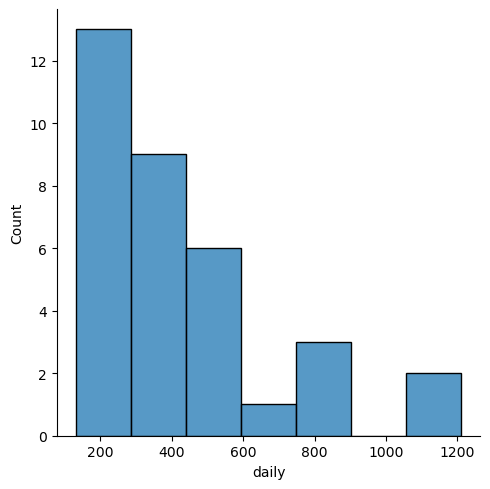

In [9]:
sns.displot(data['daily'])

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

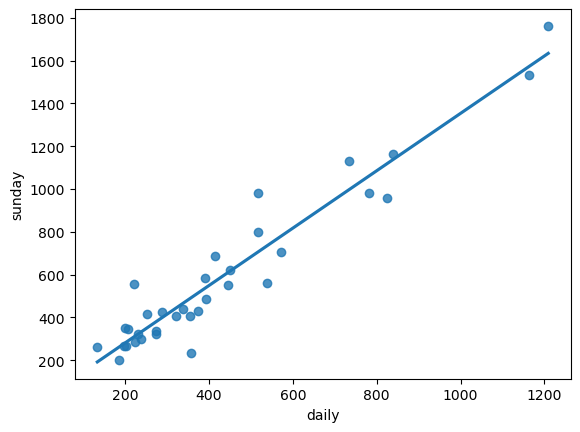

In [11]:
sns.regplot(x="daily", y="sunday", data=data,ci=None);

In [12]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [14]:
#R squared vales
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

Predict for New Data Point

In [15]:
daily=300

In [16]:
sunday=1.33*daily + 13.833

In [17]:
sunday

412.833

In [18]:
#Predict for 1000 and 3000 daily circulation
newdata=pd.Series([1000,3000])
newdata

0    1000
1    3000
dtype: int64

In [19]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000


In [20]:
model.predict(data_pred)

0    1353.550388
1    4032.979903
dtype: float64

In [21]:
data_pred['sunday']=model.predict(data_pred)

In [22]:
data_pred

,daily,sunday
0,1000,1353.550388
1,3000,4032.979903


In [23]:
model.predict(data_pred)

0    1353.550388
1    4032.979903
dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()
lr.fit(data[['daily']],data['sunday'])

LinearRegression()

In [26]:
lr.predict(data_pred[['daily']])

array([1353.55038759, 4032.97990296])

In [27]:
lr.coef_

array([1.33971476])

In [28]:
lr.intercept_

13.835629909636168